<a href="https://colab.research.google.com/github/FontanaDaniel1/GeoPandas_esericizi/blob/main/esercitazione_1_classroom.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Prendere in considerazione il dataset contenente le informazioni sui quartieri di Milano (allegato al presente post) e:
1. caricare i quartieri in un geodataframe
2. visualizzare l'intestazione
3. visualizzare i nomi di tutti i quartieri presenti in ordine alfabetico
4. visualizzare tutti i quartieri su una mappa di Milano
5. cercare il quartiere che contiene il Duomo di Milano
6. visualizzare sulla mappa il Duomo di Milano e il quartiere che lo contiene
7. visualizzare i quartieri vicini a quello che contiene il Duomo

In [ ]:
!pip install geopandas

In [ ]:
%matplotlib inline

import pandas as pd
import geopandas

quartieri = geopandas.read_file("/content/drive/MyDrive/Colab Notebooks/geopandas/primi esercizi/FONTANA DANIEL - ds964_nil_wm.zip")
quartieri

In [ ]:
#punto 2
quartieri.head()

In [ ]:
#punto 3
quartieri.sort_values(by = 'NIL') [['NIL']]

In [ ]:
#punto 4
!pip install contextily
import contextily

In [ ]:
quartieri3857 = quartieri.to_crs(epsg=3857) #cambio epsg
quartieri3857

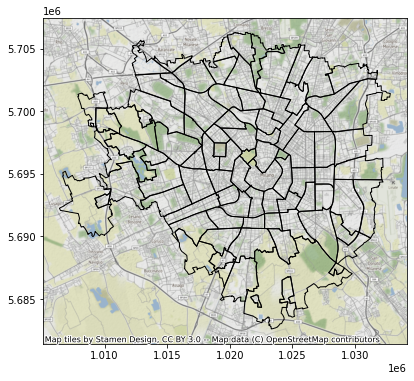

In [ ]:
ax = quartieri3857.plot(edgecolor =  "k", facecolor = "None",figsize=(12,6))
contextily.add_basemap(ax)

In [ ]:
#punto 5
from shapely.geometry import Point #importa il metodo point per creare un punto
duomo_di_milano = Point(9.191383,45.464211) #coordinate prese su maps

In [ ]:
quartiere_duomo3857 = quartieri[quartieri.contains(duomo_di_milano)].to_crs(epsg = 3857)
quartiere_duomo3857

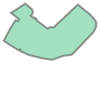

In [ ]:
duomo = quartieri.loc[quartieri['NIL'] == 'DUOMO', 'geometry'].item()
duomo #funge solo perchè il quartiere si chiama duomo

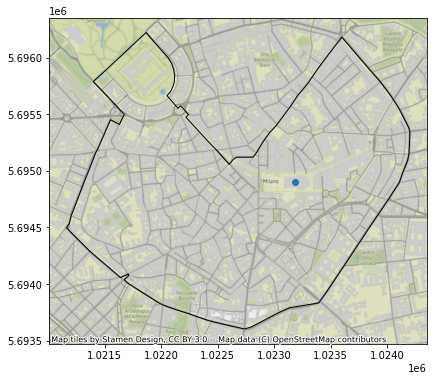

In [ ]:
#punto 6
duomo = geopandas.GeoSeries([Point(9.191383,45.464211)], crs = 4326) 
duomo3857 = duomo.to_crs(epsg = 3857)

ax = quartiere_duomo3857.plot(figsize = (12, 6), facecolor = 'none', edgecolor = 'k')
duomo3857.plot(ax = ax)
contextily.add_basemap(ax)

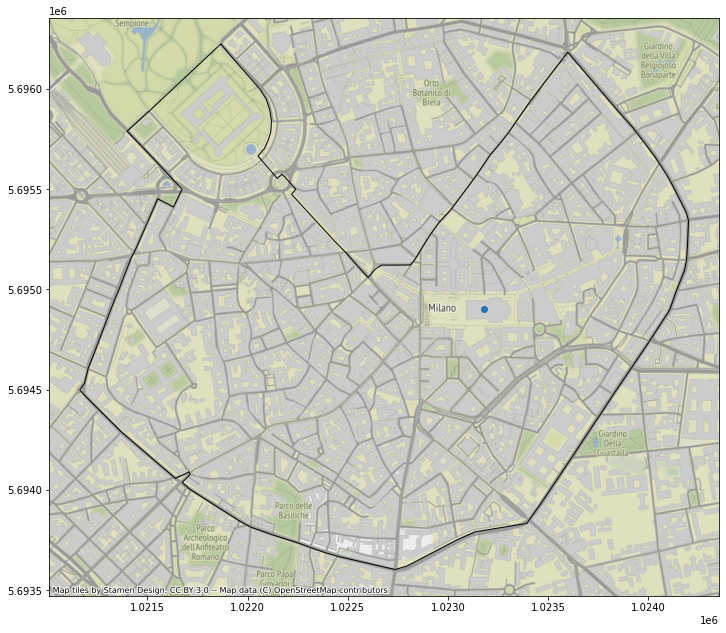

In [ ]:
#punto 7
duomo = geopandas.GeoSeries([Point(9.191383,45.464211)], crs = 4326) 
duomo3857 = duomo.to_crs(epsg = 3857)

ax = quartiere_duomo3857.plot(figsize = (12, 12), facecolor = 'none', edgecolor = 'k')
duomo3857.plot(ax = ax)
contextily.add_basemap(ax)